In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset
import cartopy.crs as ccrs
from kam11 import context

In [2]:
lat_bound = np.array((22.1,22.2))
lat_pad = 0.1
lon_bound = np.array((-159.85,-159.75))
lon_pad = 0.1

In [3]:
etopo_file = '/Users/edwardlrichards/ETOPO1/ETOPO1_Ice_g_gmt4.grd'
etopo1 = Dataset(etopo_file,'r')

lons = etopo1.variables["x"]
lats = etopo1.variables["y"]
boundIndex=np.hstack((np.argmin(np.abs(np.array(lons)-(lon_bound[0]-lon_pad))),\
                np.argmin(np.abs(np.array(lons)-(lon_bound[1]+lon_pad))),\
                np.argmin(np.abs(np.array(lats)-(lat_bound[0]-lat_pad))),\
                np.argmin(np.abs(np.array(lats)-(lat_bound[1]+lat_pad)))))
bathy=etopo1.variables['z'][boundIndex[2]:boundIndex[3],\
                            boundIndex[0]:boundIndex[1]]

In [4]:
moorings = context.MoringInfo().info

In [8]:
moorings.index

Index(['25', '24', '23', '22', '21', '20', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '12B', '13', '13B', '14', '14B', '15', '15A', '15B', '16', '17', '18', '19'], dtype='object')

In [5]:
moorings.ix[8,'lon']

-159.80886874999999

In [6]:
moorings.ix[8,'lat']

22.12626848

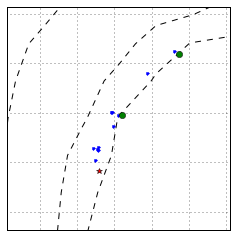

In [11]:
ax=plt.axes(projection=ccrs.UTM(4))
X, Y = np.meshgrid(lons[int(boundIndex[0]):int(boundIndex[1])],\
                lats[int(boundIndex[2]):int(boundIndex[3])])
levels = np.array((-100, -300, -600))
plt.contour(X,Y,bathy,levels,colors='k')
for i, loc in context.CTD_Info().location().iterrows():
    plt.plot(loc['lon'], loc['lat'],'b.')
    
plt.plot(moorings.ix['8','lon'], moorings.ix['8','lat'],'go')
plt.plot(moorings.ix['16','lon'], moorings.ix['16','lat'],'go')

plt.plot(moorings.ix['2','lon'], moorings.ix['2','lat'],'r*')

_ = ax.set_xlim(lon_bound[0], lon_bound[1])
_ = ax.set_ylim(lat_bound[0], lat_bound[1])
_ = ax.gridlines()